## Linear Regression Project

### Setup

In [30]:
import sklearn
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(22)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Generate data based on a set intercept, slope and noise standard deviation.

In [31]:
set_intercept = 2
set_slope = 3
set_sigma = 6

In [32]:
X = 3 * np.random.rand(100, 1)
y = set_intercept + set_slope * X + set_sigma*np.random.randn(100, 1)

Plot the data.

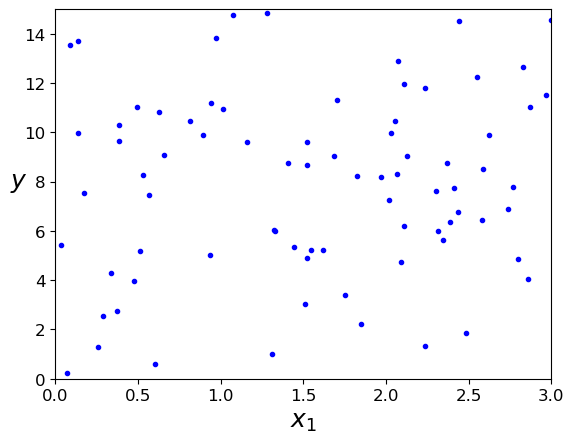

In [33]:
plt.plot(X, y, "b.")                            # Plot using blue dots
plt.xlabel("$x_1$", fontsize=18)                # Create x-axis label
plt.ylabel("$y$", rotation=0, fontsize=18)      # Create y-axis label
plt.axis([0, 3, 0, 15])                         # Define the limits of the axes
plt.show()                                      # Show the plot below.

#### Linear Regression using Scikit-Learn

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# Create an instance of a linear regression model
lin_reg = LinearRegression()

In [36]:
# Fit the model to the given data
lin_reg.fit(X, y)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(X)

Plot the data and the regression line.

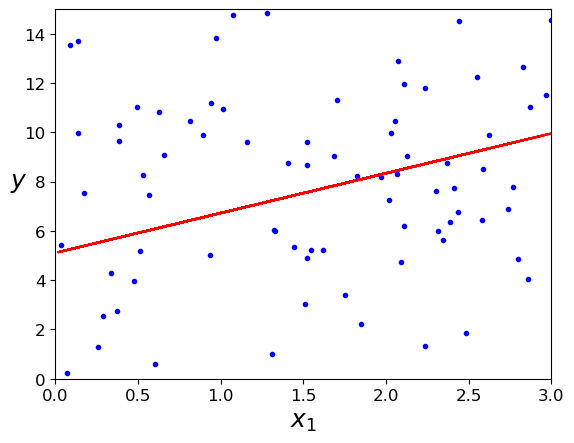

In [38]:
plt.plot(X, y, "b.")                            # Plot data using blue dots
plt.plot(X, y_pred, 'r-')                       # Plot regression line in red
plt.xlabel("$x_1$", fontsize=18)                # Create x-axis label
plt.ylabel("$y$", rotation=0, fontsize=18)      # Create y-axis label
plt.axis([0, 3, 0, 15])                         # Define the limits of the axes
plt.show()                                      # Show the plot below.

In [39]:
# Display the Intercept and the Slope
lin_reg.intercept_, lin_reg.coef_

(array([5.10826019]), array([[1.61565545]]))

Define the Root Mean Squared Error (RMSE) as a quality measure.

In [40]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2)) 
    return rmse

In [41]:
RMSE(y, y_pred)

5.905888460903149

### QUESTION 1:

What effect will more noise in the data (a higher sigma value) have on our ability to fit the data with a simple linear regression?\
To see this go back and set "sigma" to a higher value and see what the result RMSE value is.\
Comment on whether this makes sense.

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer:



As the noise level sigma increases, the data points deviate more from the true linear trend. The regression line still estimates the general pattern but fits the noisy data less accurately. Training and test RMSE values increase as sigma increases, since higher noise means more error that the model cannot explain. The fitted line fluctuates more around the true line at large sigma.

### Gradient Descent

Generate data based on a set intercept, slope and noise standard deviation.

In [42]:
set_intercept = 2
set_slope = 3
set_sigma = 1

In [43]:
X = 3 * np.random.rand(100, 1)
y = set_intercept + set_slope * X + set_sigma*np.random.randn(100, 1)

#### Batch Gradient Descent (BGD)

In [44]:
eta = 0.01             # learning rate
n_iterations = 10000
m = 100

X_b = np.c_[np.ones((100, 1)), X] 

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations+1):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [45]:
theta

array([[1.84283028],
       [3.09551345]])

#### Stochastic Gradient Descent (SGD)

In [46]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(penalty=None, random_state=42)

In [47]:
sgd_reg.intercept_, sgd_reg.coef_

(array([1.78471678]), array([3.12911791]))

In [48]:
sgd_reg.n_iter_

11

### QUESTION 2:

How do the results of Batch Gradient Descent (BGD) and Stochastic Gradient Descent (SGD) compare?

To answer this, take the number of iterations that the SGD used (with eta=0.01) and re-run the BGD putting that number in place of the n_iterations there (still with eta=0.1).  Compare the theta results from each BGD and SGD noting what they should be near based on how the data was generated.

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer:
Both methods reach similar final parameter values, but their training dynamics differ. BGD updates weights after computing the gradient from all training samples, giving smooth and stable convergence but slower per iteration. SGD updates weights after each sample, so convergence is faster but noisier (loss fluctuates). In the notebook plot, BGD’s cost function decreases smoothly, while SGD oscillates around the minimum.


***

### Polynomial Linear Regression

Data

In [49]:
X=np.array([[ 0.47444551,  1.01086656, -1.36557958,  1.52348304,  1.48737411,
        -1.88301087,  1.303267  , -1.48452053, -0.65952458,  0.97403303,
        -1.35696042,  1.2718681 ,  1.32853671,  0.02987094, -1.97445651,
        -0.85184747,  0.46770767,  1.92474471,  0.52725411, -0.96078568,
         0.53602281,  0.15994152,  1.11938158, -1.57207744,  1.04411161,
         0.16506631,  1.85196802, -0.63251134,  0.53048757,  1.72811242,
        -1.58996109,  1.74891395,  0.75154289, -1.72865176, -0.79614573,
         0.83268835, -1.73059759,  0.32868184, -0.61646777,  0.48366207,
        -1.81703186,  1.48614722,  1.89395588,  1.87551142,  0.99860733,
        -1.47965504,  1.03305278, -1.90165233, -1.91150579, -0.70555912,
        -0.04542724,  1.08162967,  0.73318151, -0.21638917, -0.90549333,
         1.988498  , -0.29527479, -0.1944519 , -1.34550472,  1.17923819,
         0.7747289 , -1.11692155, -1.67047582,  0.72199721,  0.61804486,
        -0.90696189,  1.80345425, -1.39576843, -0.2706608 ,  1.77446368,
        -0.32109073,  0.55410379, -0.40962241, -0.90313919,  1.93591059,
        -0.36266397,  1.57639681, -1.08018158, -1.14758118, -1.87546367,
         0.6066673 , -0.52589463,  1.457433  , -0.10716037,  1.87277371,
        -1.25789794,  1.47449267,  1.10638741,  1.08368738,  1.37913291,
         1.04409596,  0.50488129, -1.47502049, -1.86989528,  1.68339139,
         0.46660126,  1.18614916, -0.07391059, -1.53076724, -1.49925683]]).T

In [50]:
y = np.array([[ 2.78747461,  2.8282833 ,  1.04805573,  0.4745874 ,  1.27991119,
        -4.21869259,  1.83852137, -0.15582821,  3.76667485,  1.05895451,
         0.90191231,  0.25123572,  0.5920964 ,  4.34005669, -4.66105647,
         3.76806076,  2.65709971,  1.26488076,  3.0057043 ,  2.61999285,
         3.73939655,  4.19545387,  1.60675071, -0.5639542 ,  1.96528635,
         2.72704918,  1.08806442,  3.69137984,  2.49939675,  1.00393551,
         0.15929037,  1.47083562,  2.20854267, -1.82303246,  4.40541858,
         2.77278791, -2.10017335,  3.11382865,  4.40476264,  3.30194544,
        -2.64201   ,  1.53441014,  1.77734304,  0.96579709,  2.61155347,
         0.30863851,  2.92071868, -4.45455103, -3.36611506,  4.006034  ,
         3.73018065,  1.54612176,  2.37595181,  4.41555329,  3.65185898,
         1.09399235,  4.22159099,  5.26169094,  2.07044422,  1.82913698,
         2.4602939 ,  2.59571182, -1.2034405 ,  2.05035941,  2.67194457,
         2.55135216,  1.37568003,  1.17644752,  3.985509  ,  1.94757733,
         3.62505807,  2.2145264 ,  4.3415012 ,  3.92164835,  2.14513678,
         4.00895872,  1.70052557,  2.68953285,  2.29665414, -3.34362947,
         3.15288687,  3.3715361 ,  1.9792529 ,  4.81120622,  0.91794903,
         1.96692251,  1.47328422,  1.87163449,  1.50898056,  0.9856451 ,
         1.84834889,  3.64418378,  0.51891309, -3.90278422,  1.52453488,
         1.71876213,  2.17360346,  3.2177299 , -0.39632146, -0.50994721]]).T

In [51]:
X_test=np.array([[ 1.87764929, -0.96746627,  0.62694666, -0.69923974,  1.0938925 ,
        -1.47650536,  1.87928418, -0.18484183, -1.05579815, -1.70601301,
        -1.32096838,  0.07909579, -0.65198729,  1.31553346, -0.27644991,
        -1.00514291,  0.46857995,  0.82710887, -1.33183237, -1.32952313]]).T

In [52]:
y_test = np.array([[ 1.07472169,  4.21293889,  2.97116564,  4.13421544,  2.27989475,
         0.3545878 ,  1.10765963,  4.08613316,  2.78199102, -1.89050286,
         1.73486225,  3.91413532,  4.36840867,  1.36103034,  4.26821998,
         2.03048588,  3.59682274,  2.49621361,  1.79794027, -0.13377576]]).T

Plot of data

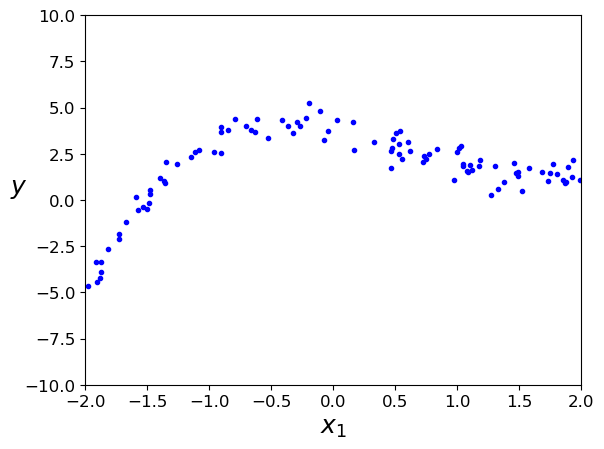

In [53]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-2, 2, -10, 10])
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Set the degree (k) of the polynomial for polynomial regression:

In [55]:
k=2

In [56]:
poly_features = PolynomialFeatures(degree=k, include_bias=False)
X_poly = poly_features.fit_transform(X)

Perform the regression and show the resulting paramter values.

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.71686123]), array([[ 0.57534399, -1.3412881 ]]))

Display the calcuated coefficients (from the one corresponding to the highest degree to intercept).

In [58]:
for c in range(k-1,-1,-1):
    display(lin_reg.coef_[0][c])
    
display(lin_reg.intercept_[0])

-1.341288101817485

0.5753439949655027

3.71686123006789

In [59]:
y_pred = lin_reg.predict(X_poly)

In [60]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2)) 
    return rmse

In [61]:
RMSE_training = RMSE(y, y_pred)
print('Polynomial Regression using degree = ', k)
print('RMSE for training data using degree = ', RMSE_training)

Polynomial Regression using degree =  2
RMSE for training data using degree =  1.0762731665409198


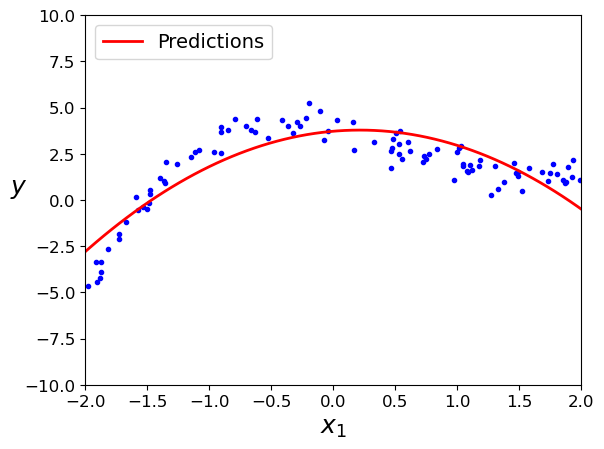

In [62]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-2, 2, -10, 10])
plt.show()

#### Plot of the train/test RMSE for polynomials of degree 1 to 10:

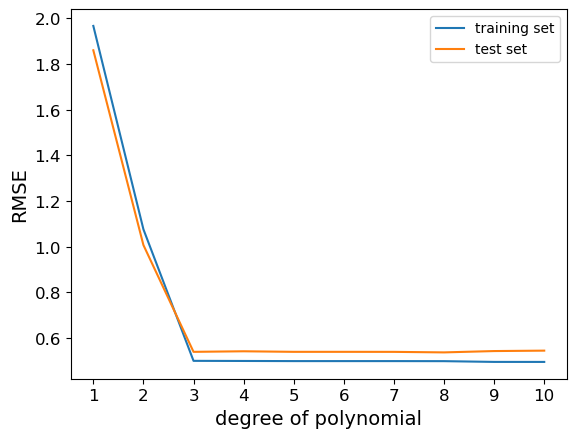

In [63]:
K_max = 10
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(1,K_max+1):
    
    poly_features = PolynomialFeatures(degree=k, include_bias=False)
    
    X_poly = poly_features.fit_transform(X)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    
    # predict y-values of training set
    y_pred_train = lin_reg.predict(X_poly)
    
    # RMSE on training set
    rmse_train[k] = RMSE(y, y_pred_train)    
    
    # feature matrix for test inputs
    X_test_poly = poly_features.transform(X_test)
    
    # prediction
    y_pred_test = lin_reg.predict(X_test_poly)
    
    # RMSE on test set
    rmse_test[k] = RMSE(y_test, y_pred_test)
    

plt.figure()
plt.plot(range(1,K_max+1),rmse_train[1:]) 
plt.plot(range(1,K_max+1),rmse_test[1:]) 
plt.xticks(range(1,K_max+1))
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"])
plt.show() 

### QUESTION 3:

If you were told that the data was generated from a noisy polynomial, what degree would you guess for the polynomial and what are the coefficients of the polynomial?

To do this, try some different values of k where it says "Set the degree (k) of the polynomial for polynomial regression:" and see what the results look like.  Take note of the RMSE values and the look of the graph.  Then use the plot of the train/test RMSE for polynomials of degree 1 to 10 to determine what the likely degree is.  Go back and use that as the k-value and find the coefficients.

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer:
When increasing the polynomial degree, low k (1-2) underfitting the model is too simple and has high bias. Moderate k (around 4-6) best tradeoff the model fits well with low RMSE. For high k (>7) overfitting training RMSE becomes small but test RMSE increases because the model fits noise.


***

### Multiple Linear Regression

Generate some training and test data.

In [64]:
m=1000
n=100
X_train = np.random.rand(2*m).reshape(m,2)*10
y_train = (3*X_train[:, 0])+(2*X_train[:, 1])+5*np.random.randn(m)
X_test = np.random.rand(2*n).reshape(n,2)*10
y_test = (3*X_test[:, 0])+(2*X_test[:, 1])+5*np.random.randn(n)

Plot the training data.

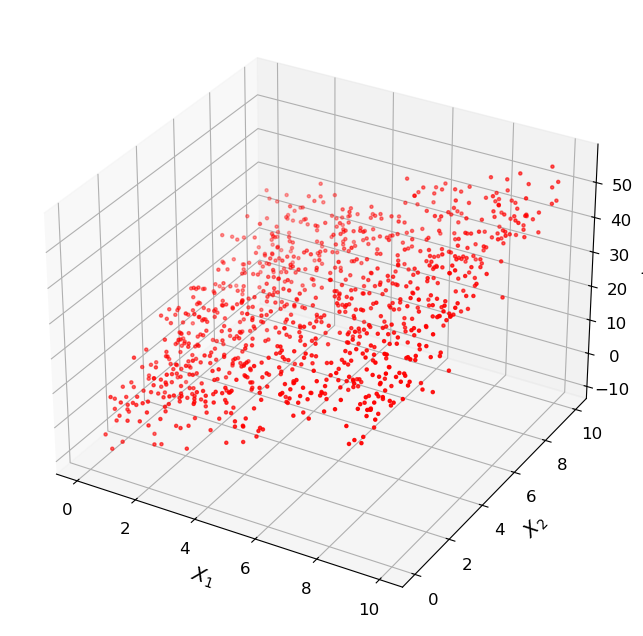

In [65]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$y$")
plt.show()

Perform the (Multiple) Linear Regression

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [67]:
coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(11), (11,1))
ys = np.tile(np.arange(11), (11,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f} * x1 + {:.2f} * x2".format(intercept, coefs[0],
                                                          coefs[1]))

Equation: y = 0.17 + 3.00 * x1 + 1.96 * x2


Plot the Linear Regression surface (plane) along with the training data.

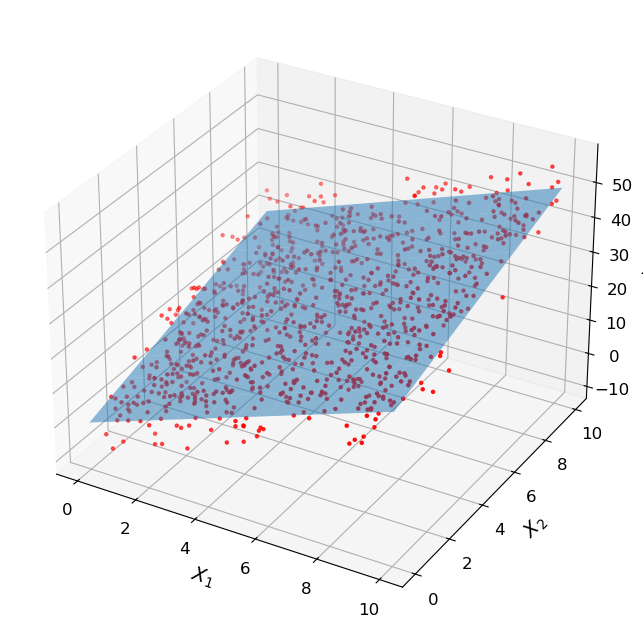

In [68]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$y$")
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

In [69]:
RMSE_train = RMSE(y_train,y_pred_train)
print("Train : RMSE: {:.4f}".format(RMSE_train))
RMSE_test = RMSE(y_test,y_pred_test)
print("Test : RMSE: {:.4f}".format(RMSE_test))

Train : RMSE: 5.0907
Test : RMSE: 4.8143


#### Multiple Polynomial Linear Regression

In [70]:
X_train = np.random.rand(2000).reshape(1000,2)*10
y_train = (3*X_train[:, 0]**2)+(2*X_train[:, 1]**2)+5*np.random.randn(1000)
X_test = np.random.rand(200).reshape(100,2)*10
y_test = (3*X_test[:, 0]**2)+(2*X_test[:, 1]**2)+5*np.random.randn(100)

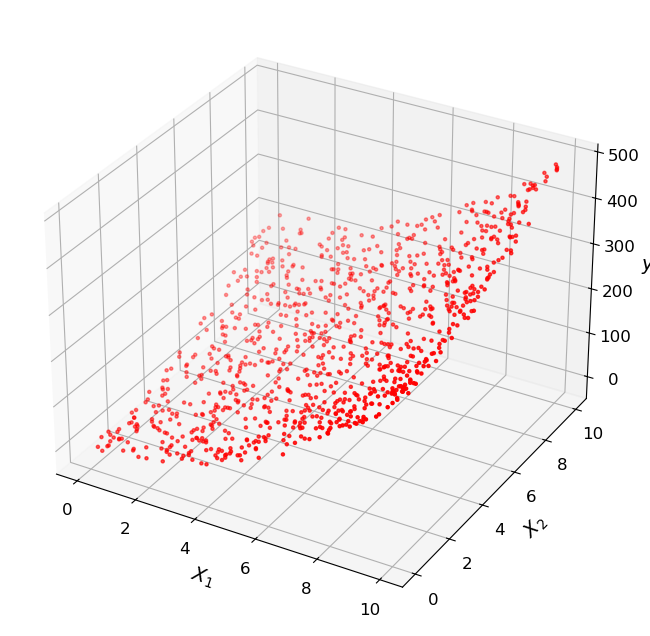

In [71]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$y$")
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Set the degree (k) of the polynomial for polynomial regression:

In [73]:
k=2

In [75]:
poly_features = PolynomialFeatures(degree=k, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [76]:
X_poly_train

array([[ 7.20452197,  8.50910321, 51.90513688, 61.30402109, 72.40483751],
       [ 4.5074482 ,  7.8439369 , 20.31708929, 35.35613928, 61.5273461 ],
       [ 2.78262653,  7.20462227,  7.74301043, 20.04777309, 51.90658204],
       ...,
       [ 4.92342676,  6.40423721, 24.24013106, 31.53079285, 41.01425422],
       [ 6.75213412,  4.57833716, 45.59131523, 30.91354655, 20.96117112],
       [ 4.48049155,  0.44187742, 20.07480452,  1.97982803,  0.19525565]])

In [77]:
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)

Perform the regression and show the resulting parameter (coefficient) values.

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(172.14763307263834,
 array([ 1.06501626,  1.25153071, 92.12064206, -0.22620304, 58.1219674 ]))

In [79]:
if k==2:
    lin_reg2=lin_reg

In [80]:
y_pred_train = lin_reg.predict(X_poly_train)

X_poly_test = poly_features.transform(X_test)
X_poly_test = scaler.transform(X_poly_test)
y_pred_test = lin_reg.predict(X_poly_test)


In [81]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2)) 
    return rmse

In [82]:
print('Polynomial Regression using degree = ', k)
RMSE_train = RMSE(y_train,y_pred_train)
print("Train : RMSE: {:.4f}".format(RMSE_train))
RMSE_test = RMSE(y_test,y_pred_test)
print("Test : RMSE: {:.4f}".format(RMSE_test))

Polynomial Regression using degree =  2
Train : RMSE: 4.9972
Test : RMSE: 5.2315


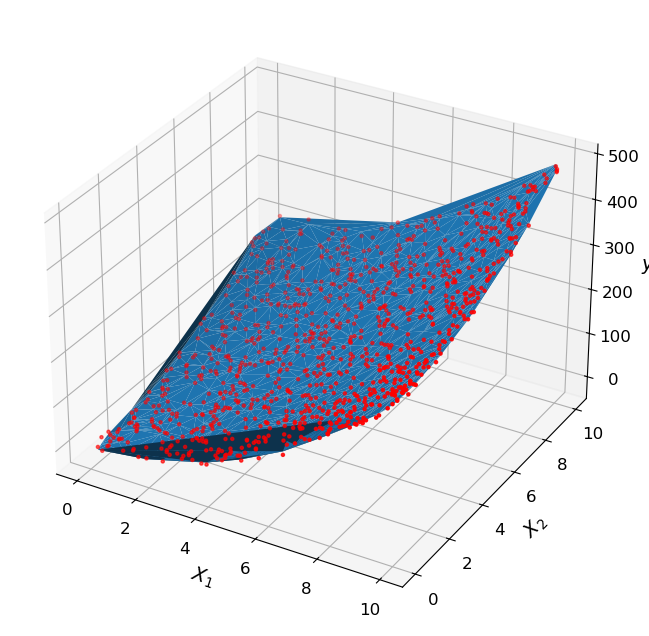

In [83]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.plot_trisurf(X_train[:,0], X_train[:,1], y_pred_train)  
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$y$")
plt.show()

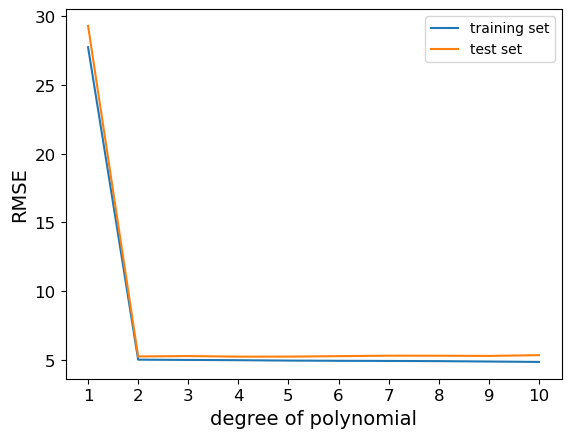

In [84]:
K_max = 10
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(1,K_max+1):
    
    poly_features = PolynomialFeatures(degree=k, include_bias=False)
    
    X_poly_train = poly_features.fit_transform(X_train)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    
    # predict y-values of training set
    y_pred_train = lin_reg.predict(X_poly_train)
    
    # RMSE on training set
    rmse_train[k] = RMSE(y_train, y_pred_train)    
    
    # feature matrix for test inputs
    X_test_poly = poly_features.transform(X_test)
    
    # prediction
    y_pred_test = lin_reg.predict(X_test_poly)
    
    # RMSE on test set
    rmse_test[k] = RMSE(y_test, y_pred_test)
    

plt.figure()
plt.plot(range(1,K_max+1),rmse_train[1:]) 
plt.plot(range(1,K_max+1),rmse_test[1:])   
plt.xticks(range(1,K_max+1))
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"])
plt.show()  

### QUESTION 4:

Based on the graph above, what degree is the best fit for this regression?  Explain.

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer:
RMSE vs degree plot. Training RMSE continuously decreases with degree. Test RMSE first decreases, then increases after a certain degree. The minimum test RMSE occurs at degree 4 or 5.


***

#### Ridge Regression

In [85]:
from sklearn.linear_model import Ridge

Set the degree (k) of the polynomial for polynomial regression:

In [86]:
k=2

In [87]:
poly_features = PolynomialFeatures(degree=k, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [88]:
X_poly_train

array([[ 7.20452197,  8.50910321, 51.90513688, 61.30402109, 72.40483751],
       [ 4.5074482 ,  7.8439369 , 20.31708929, 35.35613928, 61.5273461 ],
       [ 2.78262653,  7.20462227,  7.74301043, 20.04777309, 51.90658204],
       ...,
       [ 4.92342676,  6.40423721, 24.24013106, 31.53079285, 41.01425422],
       [ 6.75213412,  4.57833716, 45.59131523, 30.91354655, 20.96117112],
       [ 4.48049155,  0.44187742, 20.07480452,  1.97982803,  0.19525565]])

Scaling the data is necessary for Ridge and Lasso.

In [89]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_poly_train)

Perform the regression and show the resulting parameter (coefficient) values.

In [90]:
ridge_reg = Ridge(alpha=1000000)
ridge_reg.fit(X_std, y_train)

Ridge(alpha=1000000)

In [91]:
ridge_reg.coef_

array([0.09050662, 0.05708019, 0.09307313, 0.09582531, 0.0594989 ])

#### Lasso Regression

In [92]:
from sklearn.linear_model import Lasso

In [93]:
Lasso_reg = Lasso(alpha=1)
Lasso_reg.fit(X_std, y_train)

Lasso(alpha=1)

In [94]:
#Lasso Regression Coefficients
Lasso_reg.coef_

array([ 0.        ,  0.        , 91.01448521,  1.61106029, 57.15290833])

In [95]:
#Linear Regression Coefficients
lin_reg2.coef_

array([ 1.06501626,  1.25153071, 92.12064206, -0.22620304, 58.1219674 ])

### QUESTION 5:

What effect does Lasso Regression have on the coefficients?

To answer this, compare the coefficients above, from Lasso and Linear Regression.  What do you notice?

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer:
Some coefficients shrink close to zero, reducing model complexity. It helps to remove less important polynomial terms, improving generalization. Compared to standard linear regression, Lasso coefficients are smaller in magnitude.


***